# Normalización
Dentro de los pasos más importantes en el preprocesamiento de los datos se encuentra el de normalización. En este proceso se realiza una transformación a los datos que permite dimensionar la magnitud de los datos a un valor determinado.<br>
Una de las ventajas que tiene la normalización de los datos es que, en ocasiones, su uso puede mejorar el resultado de modelos de aprendizaje automático.<br><br>
Para iniciar con esta sección, importaremos las librerías que utilizaremos.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La librería **random** nos servirá para crear el conjunto de datos al que aplicaremos diversos tipos de normalización. La librería **numpy** para obtener algunos datos estadísticos de manera más sencilla; por último, **seaborn** y **matplotlib.pyplot** para graficar nuestros resultados y observar gráficamente las diferencias entre los métodos de normalización que abordaremos.<br><br>
Iniciaremos por crear una función para cada uno de los métodos de normalización que abordaremos:
- MinMax normalization
- Mean normalization
- Z-score normalization
- Unit Vector normalization

## MinMax
En el caso de **MinMax** utilizaremos la fórmula que permite obtener el vector de salida en el rango que el usuario prefiera, a diferencia de la formula simple que entrega un vector con valores entre 0 y 1.<br>
A continuación se muestra la ecuación:
\begin{align*}
x'=a+\frac{x-min(x)}{max(x)-min(x)}*(b-a)
\end{align*}
Donde:
- **x** es el dato original.
- **x'** es el dato normalizado.
- **a** es el valor mínimo deseado.
- **b** es el valor máximo deseado.

In [2]:
def minmax_normalization(x, lowLimit=0, highLimit=1):
    minX=min(x)
    maxX=max(x)
    return [(((xi-minX)/(maxX-minX))*(highLimit-lowLimit))+lowLimit for xi in x]

Podemos observar que nuestra función **minmax_normalization** recibe como argumento el vector de datos **x**. Adicionalmente tiene los argumentos **lowLimit** y **highLimit** que tienen, por defecto, el valor de 0 y 1 correspondientemente. Esto es debido a que, si no se especifica este intervalo, se asume que se quiere una normalización simple a 0 y 1. De igual manera, se da la opción a que se obtenga el vector normalizado en el intervalo que el usuario requiera.<br><br>
## Z-score
Ahora, la normalización **z-score** tiene la característica de que su vector normalizado de salida tiene una media de 0 y desviación estándar de 1. Este método de normalización han demostrado tener un efecto positivo en los algoritmos de aprendizaje automático, por lo cual es ampliamente utilizada.<br>
La ecuación para obtenerla es la siguiente:
\begin{align*}
x'=\frac{x-\mu}{\sigma}
\end{align*}
Donde:
- **x** es el dato original.
- **x'** es el dato normalizado.
- **$\mu$** es la media del vector de entrada.
- **$\sigma$** es la desviación estandar de x.

In [3]:
def zscore_normalization(x):
    m=np.mean(x)
    s=np.std(x)
    return [(xi-m)/s for xi in x]

## Mean normalization
Este método de normalización es similar al de **z-score**, solo cambia en denominador de la ecuación:
\begin{align*}
x'=\frac{x-\mu}{max(x)-min(x)}
\end{align*}
Donde:
- **x** es el dato original.
- **x'** es el dato normalizado.
- **$\mu$** es la media del vector de entrada.

In [4]:
def mean_normalization(x):
    m=np.mean(x)
    minX=np.min(x)
    maxX=np.max(x)
    return [(xi-m)/(maxX-minX) for xi in x]

Mas adelante revisaremos algunas otras características de este método comparado con los demas.

## Unit Vector
El último método a revisar se conoce como **unit vector**, aquí se normaliza cada elemento del vector de entrada con base a la distancia euclidiana del vector.<br>
Se usa la siguiente ecuación:
\begin{align*}
x'=\frac{x}{||x||}
\end{align*}
Donde:
- **x** es el dato original.
- **x'** es el dato normalizado.
- **||x||** es la distancia euclidiana del vector de entrada x.

In [5]:
def unit_vector(x):
    unitVector=0
    for xi in x:
        unitVector+=xi**2
    unitVector=unitVector**(1/2)
    return [xi/unitVector for xi in x]

Aquí obtenemos un vector de salida con valores muy pequeños, su característica es que cada elemento es tomado como una componente para crear un vector unitario, es decir un vector con magnitud de uno. Se puede comprobar al obtener la magnitud del vector normalizado, realizaremos este proceso más adelante.
## Comparación de métodos
Una vez que hemos revisado distinos métodos de normalización, procedamos a revisar de una forma más dinámica sus características.<br>
Para iniciar crearemos un conjunto de datos con valores en el intervalo [0,10] con 500 datos.

In [6]:
# random.random() genera un valor aleatorio entre 0 y 1.
x=[random.random()*10 for _ in range(500)]

Con la línea de código anterior generamos el conjunto de datos deseado, multiplicamos por 10 debido a que queremos que nuestro rango sea [0,10].<br>
Ahora procederemos a obtener la normalización de nuestro conjunto de datos **x** para cada uno de los métodos revisado.

In [7]:
x_mm=minmax_normalization(x)
x_mm2=minmax_normalization(x, lowLimit=-5, highLimit=6)
x_z=zscore_normalization(x)
x_m=mean_normalization(x)
x_u=unit_vector(x)

Lo primero que haremos es revisar algunas estadísticas de nuestros datos normalizados. Para reducir el código y poder utilizar un ciclo **for**, guardaremos los conjuntos normalizados en una lista llamada **data** que contendrá los datos y otra lista con los nombres correspondientes, llamada **names**.<br><br>
También desplegaremos un **distplot** de la librería **seaborn**, este gráfico muestra un histograma de los datos junto con una gráfica de densidad de probabilidad. Y finalmente un **boxplot** con los 5 vectores normalizados.

MinMax
Min: 0.0 Max: 1.0 Media: 0.5188099325681873 Std: 0.2907765529309068


/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_10490/2768201158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[index])


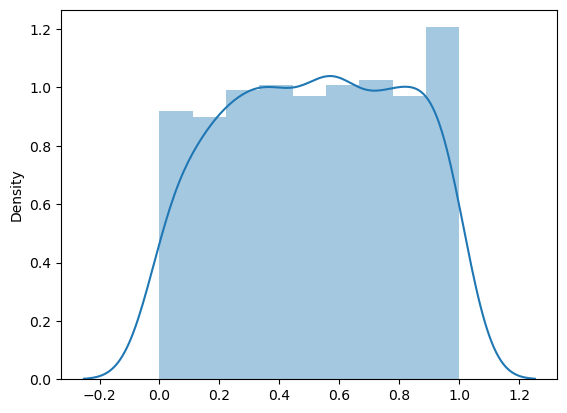

MinMax2
Min: -5.0 Max: 6.0 Media: 0.7069092582500596 Std: 3.198542082239975


/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_10490/2768201158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[index])


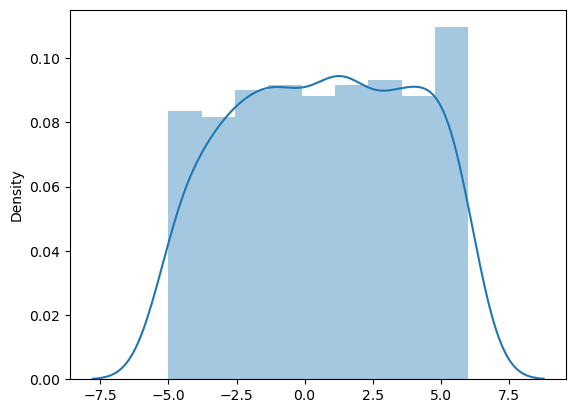

Z-score
Min: -1.7842220335126706 Max: 1.6548448029306935 Media: -6.394884621840901e-17 Std: 1.0


/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_10490/2768201158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[index])


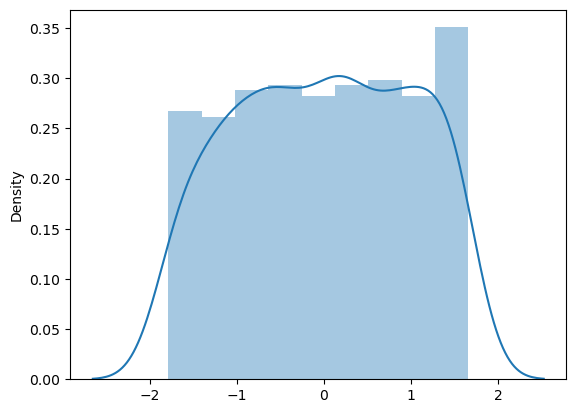

Mean Norm
Min: -0.5188099325681873 Max: 0.4811900674318128 Media: -1.5987211554602253e-17 Std: 0.2907765529309068


/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_10490/2768201158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[index])


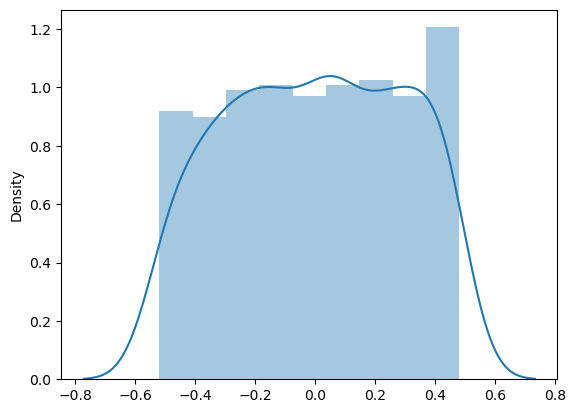

Unit Vector
Min: 7.763443249395139e-05 Max: 0.07515864191074383 Media: 0.039030406859436324 Std: 0.02183179654510513


/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_10490/2768201158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[index])


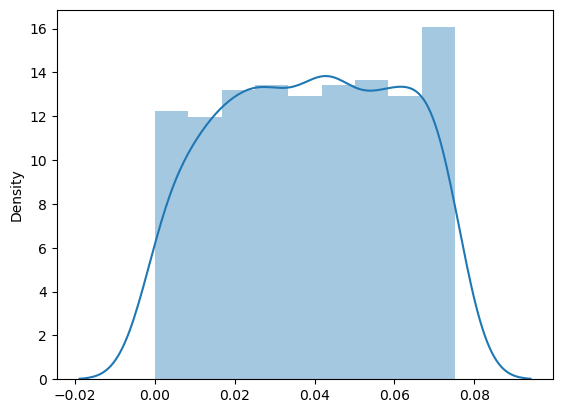

Comparación de datos


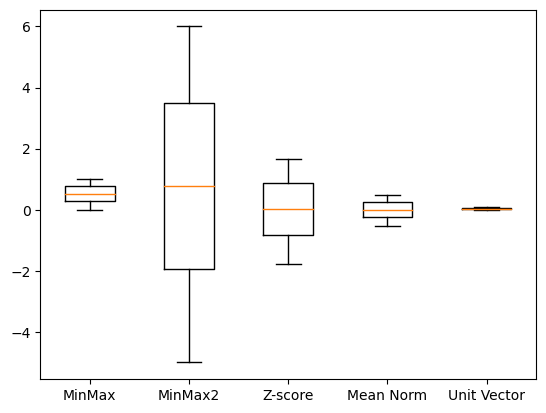

In [8]:
names=['MinMax', 'MinMax2', 'Z-score', 'Mean Norm', 'Unit Vector']
data=[x_mm, x_mm2, x_z, x_m, x_u]

for index in range(len(names)):
    print(names[index])
    print('Min:', np.min(data[index]), 'Max:', np.max(data[index]),
          'Media:', np.mean(data[index]), 'Std:', np.std(data[index]))
    sns.distplot(data[index])
    plt.show()
print('Comparación de datos')
plt.boxplot(data, labels=names)
plt.show()

Del resultado anterior podemos observar que todas las gráficas muestran una misma distribución, simplemente cambian los valores en el eje x en los que oscilan los datos.<br><br>
En el último gráfico, se puede ver claramente la diferencia en la magnitud de los datos. Los datos de **MinMax** oscilan entre 0 y 1, como es esperado. **MinMax2** oscila entre los valores ingresados -5 y 6. Y esto se repite sucesivamente con cada método.<br><br>
Ahora grafiquemos cada conjunto normalizado junto con tres líneas, la primera en -1, la segunda en 0 y la tercera en 1. Esto nos permitirá ver algunas características de cada función.

MinMax


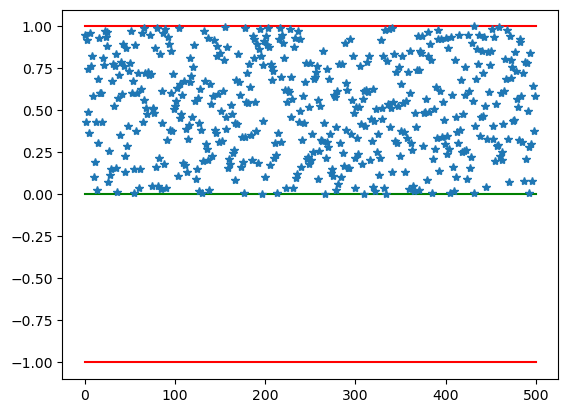

MinMax2


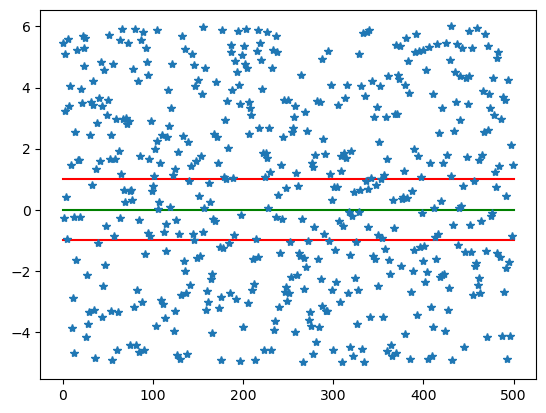

Z-score


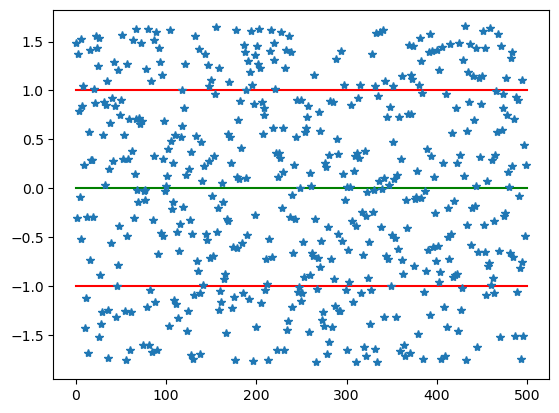

Mean Norm


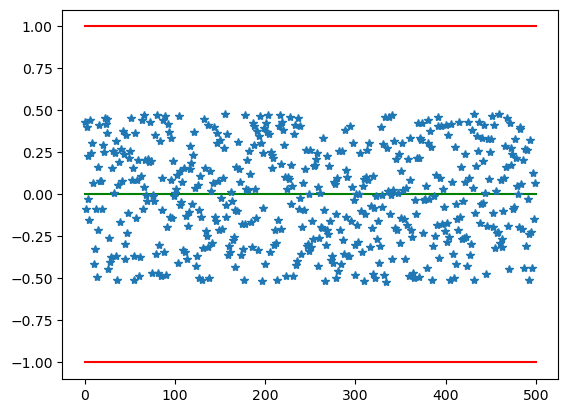

Unit Vector


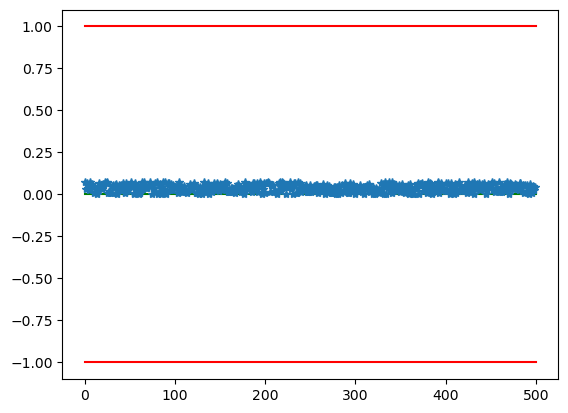

In [9]:
for index in range(5):
    print(names[index])
    plt.plot([0,500],[1,1], 'r')
    plt.plot([0,500],[-1,-1], 'r')
    plt.plot([0,500],[0,0], 'g')
    plt.plot(data[index], '*')
    plt.show()

Veamos algunos comentarios simples de cada gráfico:
#### MinMax
Se encuentra en el rango esperado de 0 y 1.<br>
No existen valores negativos.
#### MinMax2
Tiene una misma distribución que el resto de los datos pero en el intervalo deseado.<br>
Da la posibilidad a contar con valores negativos.
#### Z-score
Los datos estan distribuidos uniformemente alrededor del valor 0.<br>
Los valores de -1 y 1 también están en una zona donde la distribución de los datos es cercana a estos valores, por lo cual puede verse graficamente un dato que ya conocíamos, la desviación estandar es 1.
#### Mean normalization
Aun cuando este tipo de normalización se calcula de manera similar a **z-score**, el vector resultante tiene magnitudes menores.<br>
Se observa que también tiene valores negativos.
#### Unit Vector
Cuenta con valores muy pequeños, comparado con los demás métodos.<br>
No cuenta con valores negativos.<br><br>
Por último, revisemos una característiva de la noramalización **unit vector**. Al realizar una suma de cuadrados del vector, obtenemos el valor de 1. Esto lo veremos de forma gráfica al hacer una suma acumulativa de cada valor.

In [ ]:
current=0
uv=[current]
for d in data[-1]:
    current+=d**2
    uv.append(current)
plt.plot(uv, marker='*')
plt.show()

En este capítulo revisamos algunos de los métodos de normalización más utilizados y sus características fundamentales. El uso de cada método depende de la aplicación, para muchos modelos de aprendizaje automático es adecuado que se normalicen los datos para un correcto funcionamiento. Como ejemplo, en el algoritmo de **kmean** si no se normalizan los datos de entrada, pueden tenerse sesgos por la dimensionalidad de cada característica.<br><br>
**Nota**: Si realizas los ejercicios puedes obtener resultados levemente distintos, debido a que el conjunto creado es mediante valores aleatorios.